# Neural & Behavioral Modeling - Week 8 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [77]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from numpy.linalg import norm
from matplotlib.pyplot import *
from IPython.display import *
from time import sleep
from mpl_toolkits.mplot3d import Axes3D

## 1 Neural Computation

### 1.1 Logic Operations

In [2]:
# Supporting functions: -----------------------
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
#----------------------------------------------

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1]) # try AND, OR, NAND
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


### 1.2 Pattern Recognition

In [3]:
RETINA=matrix('0 0 0 0 0;0 0 1 0 0;0 1 1 1 0')
LGN_RF=matrix('0;-0.5;1;-0.5;0')
LGN_RESPONSE=RETINA*LGN_RF
print(LGN_RESPONSE)

[[0.]
 [1.]
 [0.]]


### 1.3 Perceptron w/o learning

-1
-1
1
1
1


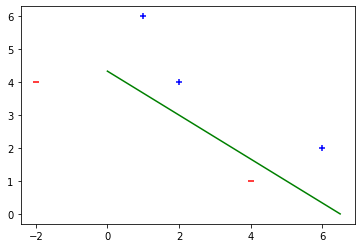

In [20]:
X = array([   #[x1,x2,bias]
    [-2,4, 1], 
    [4, 1, 1],
    [1, 6, 1],
    [2, 4, 1],
    [6, 2, 1],
])

y = array([-1,-1,1,1,1]) # ground-truth category

# The hand-written, magic hyperplane:
w=[2, 3, -13] # w0x0+w1x1+w2=0 or 2x+3y-13=0


# Testing:
for i, x in enumerate(X):
    print(sign(dot(x, w))) 
    
# Ploting:
for i, x in enumerate(X): # samples
    if(i<2): scatter(x[0],x[1],marker='_',color='r') # the first two points belong to "-"
    else: scatter(x[0],x[1],marker='+',color='b') # the last three points belong to "+"
plot([0,13/2],[13/3,0],'g'); # Two points of the hyperplane: [x1,x2],[y1,y2]

## 2 Unsupervised Learning

### 2.1 Hopfield Network (Attractor Network)

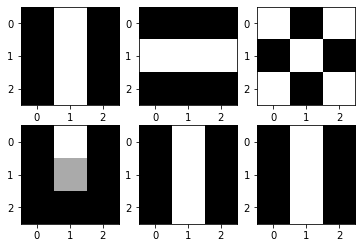

In [24]:
p=array([ # try replacing -1 to 0
    
    [-1,1,-1,
     -1,1,-1,
     -1,1,-1], # 3x3 pattern 1 
    
    [-1,-1,-1,
      1, 1, 1,
     -1,-1,-1], # 3x3 pattern 2
    
    [1,-1 ,1,
    -1, 1,-1,
     1,-1,1],   # 3x3 pattern 3
])

# Visualize the patterns to be remembered:
w=zeros([9,9]);
for i in range(3):
    subplot(2,3,i+1);
    imshow(p[i].reshape((3,3)),cmap='gray')
    w=w+outer(p[i],p[i]); # learning

# Retrieval cue:
subplot(2,3,4)
cue=array([0,0.6,0,0,0.4,0,0,0,0])
imshow(cue.reshape((3,3)),cmap='gray')

# Iterative Recalls:
for t in [2,3]:
    subplot(2,3,t+3);
    cue=matmul(w,cue)>0
    imshow(cue.reshape((3,3)),cmap='gray')

### 2.2 Instar Learning

In [88]:
W=random.rand(3) # random initial weights
for i in range(10): # 10 trials 
    x=array([0,1,0])+0.1*random.rand(3) # same stimulus + noise
    y=dot(W,x) # the only postsynaptic neuron
    W=W+y*(x-W) # postsynaptically gated InStar 
    print(W,y)

[0.05885367 0.98582468 0.01494412] 0.8534874007797129
[0.07840188 1.00747769 0.0328789 ] 0.9983398192389511
[0.04960559 1.05054862 0.05722872] 1.061736646445776
[0.08028951 1.05776876 0.09993117] 1.119704365769269
[0.02104296 0.9988096  0.07695216] 1.0704582010338428
[0.02980672 1.10372343 0.07826856] 1.099546843351853
[ 0.02605435  1.00205885 -0.00113788] 1.1193193374790924
[0.03690523 1.09444938 0.0782685 ] 1.0899211599851109
[0.00766746 1.00166781 0.05851734] 1.1115955731657121
[0.08057929 1.05764989 0.10152366] 1.0624934502452745


### 2.3 Self-Organizing Map

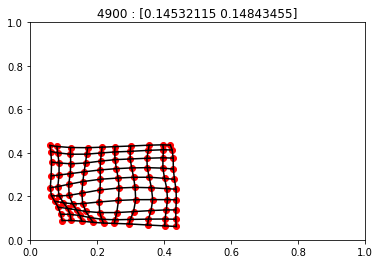

In [112]:
# 2D Kohonen SOM:
nn=10 # 10x10 neurons
lmbda=0.2 # learning rate
sig=4.0 # sigma of the neighbor function
[X,Y]=meshgrid(range(nn),range(nn)) # topological coordiates (x,y) of neurons

# Each neuron's initially preferred features: (w1,w2), namly random values around [0.5, 0.5]
w1=0.5-0.1*(random.rand(nn,nn)-0.5); # Xs of 10x10 neurons
w2=0.5-0.1*(random.rand(nn,nn)-0.5); # Ys of 10x10 neurons

# Training:
for t in range(5000):
    x=0.5*random.rand(2) # Generating a stimulus's feature vector [0~0.5, 0~0.5]
    r=exp(-(w1-x[0])**2-(w2-x[1])**2); # neurons' responses to stimuli using a Gaussian tuning/response function
    yx=where(r==amax(r)) # The winner = The maximally responding neuron
    N=exp(-((X-yx[1][0])**2+(Y-yx[0][0])**2)/sig) # topological neighborhood function
    w1=w1+lmbda*N*(x[0]-w1); # Kohonen learning of inputs' Xs
    w2=w2+lmbda*N*(x[1]-w2); # Kohonen learning of inputs' Ys
    if(mod(t,100)==0): # Plot the grid of feature centers every 100 trials
        clf() # clear previous figure
        plot(w1,w2,'ro'); # plot the tuning features (w1,w2) of each neuron 
        plot(w1,w2,'k'); # plot the horizontal connections
        plot(w1.T,w2.T,'k'); # plot the vertical connections
        axis([0,1,0,1]); title(str(t)+' : '+str(x))
        display(gcf()); clear_output(wait=True) # to allow dynamic plots